In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
df = pd.read_csv('boat_data.csv')
df.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75
2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124
3,DKK 25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58


In [15]:
df.shape

(9888, 10)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        9888 non-null   object 
 1   Boat Type                    9888 non-null   object 
 2   Manufacturer                 8550 non-null   object 
 3   Type                         9882 non-null   object 
 4   Year Built                   9888 non-null   int64  
 5   Length                       9879 non-null   float64
 6   Width                        9832 non-null   float64
 7   Material                     8139 non-null   object 
 8   Location                     9852 non-null   object 
 9   Number of views last 7 days  9888 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 772.6+ KB


In [17]:
df.isnull().sum()

Price                             0
Boat Type                         0
Manufacturer                   1338
Type                              6
Year Built                        0
Length                            9
Width                            56
Material                       1749
Location                         36
Number of views last 7 days       0
dtype: int64

In [21]:
df['Material'].fillna(df['Material'].mode(), inplace=True)

In [22]:
df.isnull().sum()

Price                             0
Boat Type                         0
Manufacturer                   1338
Type                              6
Year Built                        0
Length                            9
Width                            56
Material                       1748
Location                         36
Number of views last 7 days       0
dtype: int64

In [26]:
df['Currency']=df['Price'].str.split(' ').str[0]

In [27]:
df['Price1']=df['Price'].str.split(' ').str[1]

In [28]:
def price_USD(price, currency):
  if currency == 'CHF':
    return int(price)*1.12
  elif currency == 'EUR':
    return int(price)*1.10
  elif currency == 'DKK':
    return int(price)*0.15
  elif currency == 'Â£':
    return int(price)*1.25

In [31]:
df['Price'] = df.apply(lambda x : price_USD(x.Price1, x.Currency), axis=1)

In [32]:
df.head(2)

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,Currency,Price1
0,3737.44,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.0,1.9,GRP,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,CHF,3337
1,3839.00,Center console boat,Terhi power boats,new boat from stock,2020,4.0,1.5,Thermoplastic,Germany Â» BÃ¶nningstedt,75,EUR,3490


In [ ]:
df.drop('Price1', axis=1, inplace=True)

In [36]:
df.drop('Currency', axis=1, inplace=True)

In [37]:
df.head(1)

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,3737.44,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.0,1.9,GRP,Switzerland Â» Lake Geneva Â» VÃ©senaz,226


In [18]:
df['Material'].value_counts()

GRP                    5484
PVC                    1123
Steel                   939
Wood                    235
Aluminium               229
Plastic                  77
Carbon Fiber             30
Thermoplastic            15
Hypalon                   5
Reinforced concrete       1
Rubber                    1
Name: Material, dtype: int64

In [40]:
df['Material'].fillna('GRP', inplace=True)

In [41]:
df.isnull().sum()

Price                             0
Boat Type                         0
Manufacturer                   1338
Type                              6
Year Built                        0
Length                            9
Width                            56
Material                          0
Location                         36
Number of views last 7 days       0
dtype: int64

In [42]:
df.Manufacturer.value_counts()

BÃ©nÃ©teau power boats         631
Jeanneau power boats           537
Sunseeker power boats          383
Princess power boats           241
Sea Ray power boats            239
                              ... 
Aegean Yachts power boats        1
ISA Yachts power boats           1
Couach power boats               1
Perini Navi Spa power boats      1
Hunter power boats               1
Name: Manufacturer, Length: 910, dtype: int64

In [43]:
df['Manufacturer'].fillna('BÃ©nÃ©teau power boats', inplace=True)

In [44]:
df.isnull().sum()

Price                           0
Boat Type                       0
Manufacturer                    0
Type                            6
Year Built                      0
Length                          9
Width                          56
Material                        0
Location                       36
Number of views last 7 days     0
dtype: int64

In [46]:
df.dropna(inplace=True)

In [47]:
df.isnull().sum()

Price                          0
Boat Type                      0
Manufacturer                   0
Type                           0
Year Built                     0
Length                         0
Width                          0
Material                       0
Location                       0
Number of views last 7 days    0
dtype: int64

In [48]:
df.head(2)

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,3737.44,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.0,1.9,GRP,Switzerland Â» Lake Geneva Â» VÃ©senaz,226
1,3839.00,Center console boat,Terhi power boats,new boat from stock,2020,4.0,1.5,Thermoplastic,Germany Â» BÃ¶nningstedt,75


In [49]:
df.duplicated().sum()

0

In [50]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [54]:
df.shape

(9790, 10)

In [55]:
df.Location.nunique()

2975

In [56]:
df.Location.value_counts()

Netherlands Â» In verkoophaven             309
Croatia (Hrvatska)                         240
Italy Â» Toscana Â» Toscana                173
Italy                                      155
France                                     152
                                          ... 
Germany Â» Mittelmeer                        1
Germany Â» Nord Italien                      1
Spain Â» Mittelmeer                          1
Italy Â» La Spezia, Italie                   1
Switzerland Â» Bielersee Â» Gerolfingen      1
Name: Location, Length: 2975, dtype: int64

In [60]:
df['Location']=df['Location'].str.split(' ').str[0]

In [61]:
df.Location.nunique()

112

In [62]:
df['Boat Type'] = le.fit_transform(df['Boat Type'])
df['Manufacturer'] = le.fit_transform(df['Manufacturer'])
df['Type'] = le.fit_transform(df['Type'])
df['Material'] = le.fit_transform(df['Material'])
df['Location'] = le.fit_transform(df['Location'])

In [63]:
df.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,3737.44,96,653,15,2017,4.00,1.90,2,90,226
1,3839.00,38,794,15,2020,4.00,1.50,9,30,75
2,4222.40,116,489,15,0,3.69,1.42,0,90,124
3,3885.00,116,605,15,2020,3.00,1.00,2,21,64
4,3738.90,73,452,15,2019,3.55,1.46,0,30,58


In [64]:
df['Year Built'].nunique()

121

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9790 entries, 0 to 9887
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        9790 non-null   float64
 1   Boat Type                    9790 non-null   int64  
 2   Manufacturer                 9790 non-null   int64  
 3   Type                         9790 non-null   int64  
 4   Year Built                   9790 non-null   int64  
 5   Length                       9790 non-null   float64
 6   Width                        9790 non-null   float64
 7   Material                     9790 non-null   int64  
 8   Location                     9790 non-null   int64  
 9   Number of views last 7 days  9790 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 1.1 MB


<Axes: >

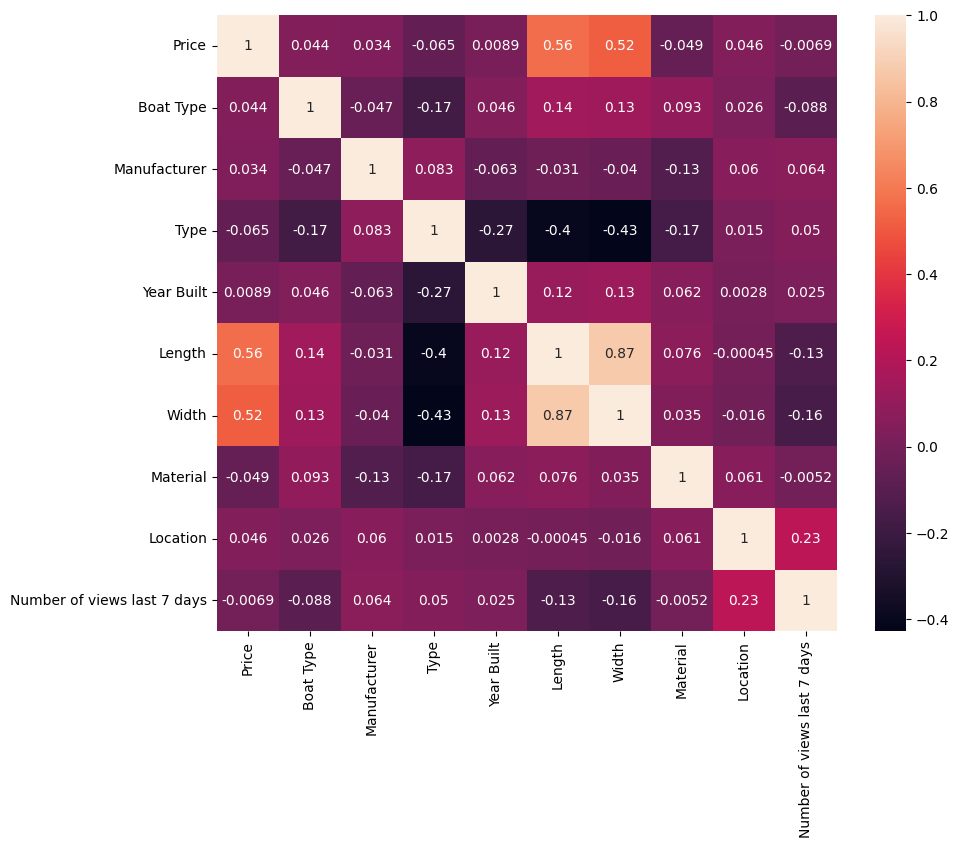

In [67]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot = True)

In [68]:
X = df.drop(['Price'], axis=1)
y = df.Price

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [71]:
from sklearn.ensemble import RandomForestRegressor

In [80]:
model = RandomForestRegressor()

In [81]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [82]:
y_pred = model.predict(X_test)

In [83]:
y_pred

array([380235.5  , 115031.389,  29997.46 , ..., 347014.818, 220980.75 ,
        39173.654])

In [84]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [85]:
mse = mean_squared_error(y_test, y_pred)
mse

92866959157.71701

In [86]:
mae = mean_absolute_error(y_test, y_pred)
mae

76498.29966036773

In [87]:
rs = r2_score(y_test, y_pred)
rs

0.831199077422974

In [88]:
#using featute selection technique RFE

In [89]:
from sklearn.feature_selection import RFE
rfe = RFE(RandomForestRegressor())

In [90]:
rfe.fit(X,y)

RFE(estimator=RandomForestRegressor())

In [91]:
X_train1 = rfe.transform(X_train)
X_test1 = rfe.transform(X_test)

In [92]:
model.fit(X_train1, y_train)

RandomForestRegressor()

In [93]:
y_pred1= model.predict(X_test1)
y_pred1

array([388051.4  ,  97549.489,  39281.2  , ..., 325975.65 , 221082.5  ,
        49650.639])

In [95]:
mse1 = mean_squared_error(y_test, y_pred1)
mse1

89868273348.90532

In [96]:
rs1 = r2_score(y_test, y_pred1)
rs1

0.8366496804753082

In [97]:
rfe.n_features_

4

In [98]:
rfe.get_support()

array([False, False,  True,  True,  True,  True, False, False, False])

In [99]:
rfe.ranking_

array([5, 4, 1, 1, 1, 1, 6, 3, 2])

In [100]:
feature_selected = X.columns[rfe.get_support()]
feature_selected

Index(['Type', 'Year Built', 'Length', 'Width'], dtype='object')

In [ ]:
#Conclusion
#from the above model we can conclude using RFE technique the percentage is increased but not much difference and the features
#that are selected using RFE are 'Type', 'Year Built', 'Length', 'Width' and accuracy we got is 83.6%.